21.03.11 Python 데이터 시각화(Seaborn)

# CH13 데이터시각화

# 3절. Seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
  - 공식 사이트 : https://seaborn.pydata.org/
  - 그래프 API : https://seaborn.pydata.org/api.html
- seaborn으로 그래프를 그리기 위한 단계
  - 1) 데이터 준비
  - 2) 미적속성 설정
  - 3) 함수를 이용하여 그래프 그리기
  - 4) 그래프 출력, 저장

In [1]:
# 수업 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config lnlineBackend.figure_formate = 'retina'

# 한글 설정
plt.rc("font", family="Malgun Gothic") 
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')

## 3.1 데이터 준비하기

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.info() # 결측치를 제외한 데이터를 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris.describe() # 결측치 제외 데이터

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.describe(exclude='float64')

,species
count,150
unique,3
top,virginica
freq,50


In [17]:
# R 패키지의 데이터 셋 가져오기 (Titanic)
import statsmodels.api as sm
r_titanic = sm.datasets.get_rdataset('Titanic', package='datasets').data
r_titanic.head()

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [19]:
titanic = sns.load_dataset('titanic')
titanic.head()
# survived: 생존여부, pclass: 좌석 클래스, sibsp: 함께 탑승한 형제, 배우자
# parch: 함께 탑승한 부모, 자녀수, fare: 티켓값

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3.2 Seaborn 스타일 지정(미적속성 설정)

- 1) 스타일 지정

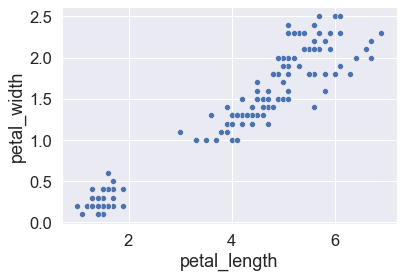

In [23]:
sns.set(style='darkgrid') # style: white(기본), darkgrid, whitegrid, dark, ticks...
sns.set_context('notebook', font_scale=1.5,
                rc={'lines.linewidth':2.5})
ax = sns.scatterplot(x='petal_length', y='petal_width', data=iris)

- 2) 절러 파레트 지정
    - 참조 사이트
    - https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
    - https://matplotlib.org/tutorials/colors/colormaps.html
    - https://seaborn.pydata.org/tutorial/color_palettes.html
    - http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

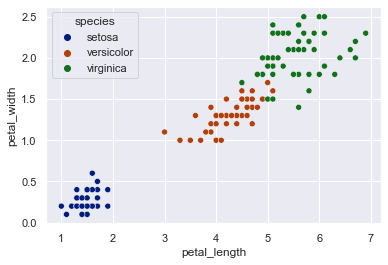

In [99]:
sns.set_palette('dark',3) # 사용할 파레트 지정
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')

- 3) 컨텍스트 지정

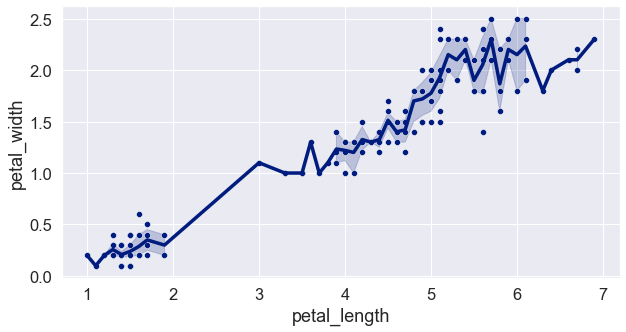

In [30]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth':3.5}) 
# notebook이 기본값(기본값: 1배율), paper(0.8), talk(1.3), paster(1.6)
ax = sns.lineplot(x='petal_length', y='petal_width', data=iris)
ax = sns.scatterplot(x='petal_length', y='petal_width', data=iris)

plt.show()

## 3.3 Seaborn으로 그래프 그리기

- 1) Relational plots : 관계형 그래프(수치형)

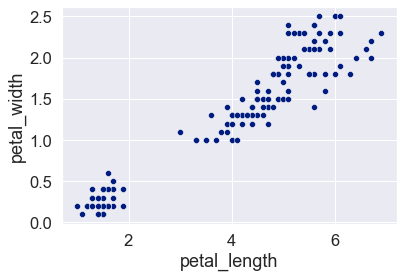

In [31]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.show()

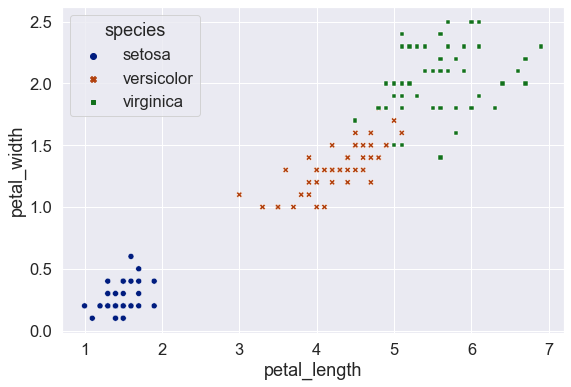

In [35]:
# hue 속성에 그룹 변수를 넣어 그룹화 하여 그룹별 다른 색상, 다른 style 사용 가능
plt.figure(figsize=(9,6))
ax = sns.scatterplot(x='petal_length', y='petal_width', data=iris, 
                     hue='species', style='species')

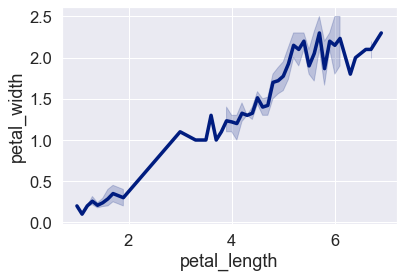

In [37]:
# lineplot : 신뢰 구간을 나타내는 오차 밴드가 있는 단일 선 그래프
ax = sns.lineplot(x='petal_length', y='petal_width', data=iris)

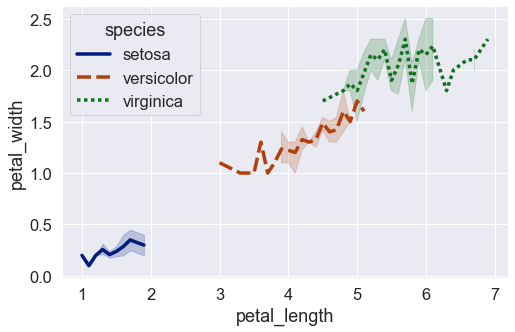

In [40]:
plt.figure(figsize=(8,5))
ax = sns.lineplot(x='petal_length', y='petal_width',
                  hue='species', style='species', data=iris)

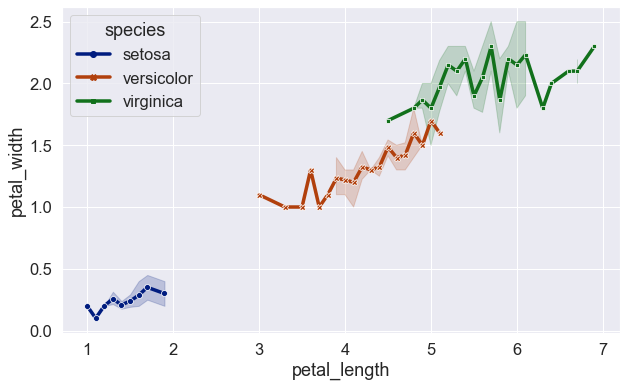

In [42]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='petal_length', y='petal_width',
                 hue='species', style='species',
                 markers=True, dashes=False, data=iris)

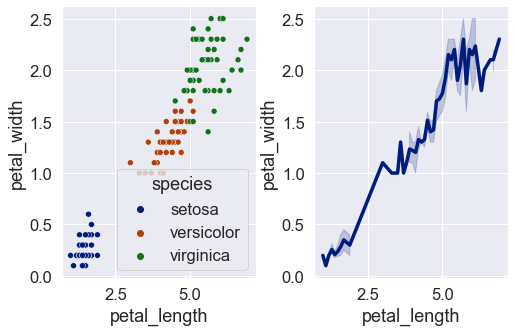

In [50]:
# 축에 그리기
fig, axes = plt.subplots(ncols=2, figsize=(8,5))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris, ax = axes[0])
sns.lineplot(x='petal_length', y='petal_width', data=iris, ax = axes[1])

plt.show()

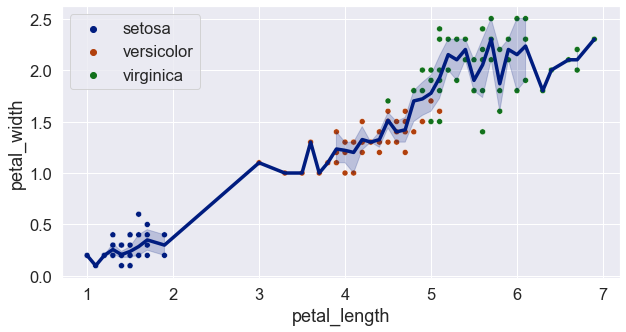

In [51]:
# 그래프 겹처 그리기(축 하나에 여러개의 그래프를 그릴 수 있다.)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
ax = sns.lineplot(x='petal_length', y='petal_width', data=iris)

In [111]:
# lineplot을 서브플롯으로 표현
sns.regplot(x='petal_length', y='petal_width', hue='species', data=iris, 
            kind='line',    # 기본값은 scatter
            col='species',  # col 단위로 서브플롯 표현
            col_wraps=2)    # 한줄에 표현될 그래프수

TypeError: regplot() got an unexpected keyword argument 'hue'

- 2) Categorical plots : 범주형 그래프

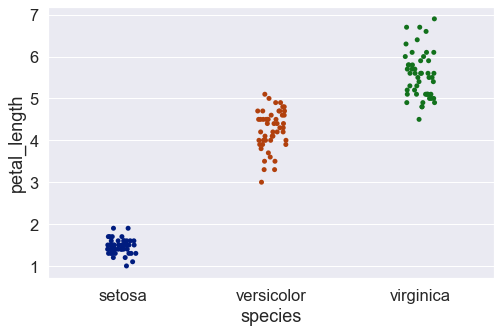

In [49]:
# x축이 범주형 데이터일 경우 scatterplot는 적합하지 않다.
# stripplot : 변수 한개가 범주형인 산점도
plt.figure(figsize=(8,5))
iris = sns.load_dataset('iris')
ax = sns.stripplot(x='species', y='petal_length', data=iris)

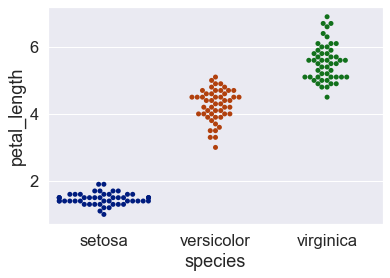

In [55]:
# swaemplot : 범주형 산점도의 점들이 중첩되지 않게 플로팅
plt.figure(figsize=(6,4))
ax = sns.swarmplot(x='species', y='petal_length', data=iris)

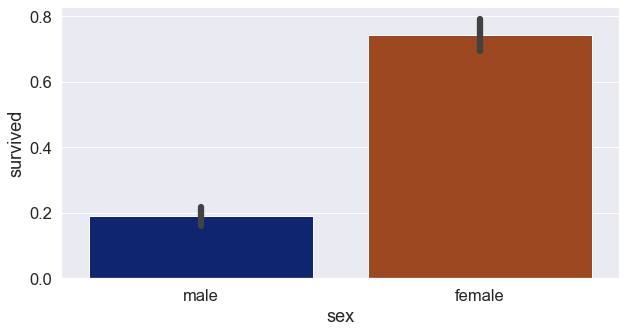

In [71]:
# barplot : 사분위 그래프
titanic = sns.load_dataset('titanic')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='sex', y='survived', data=titanic, ci=95) # ci : 표본오차

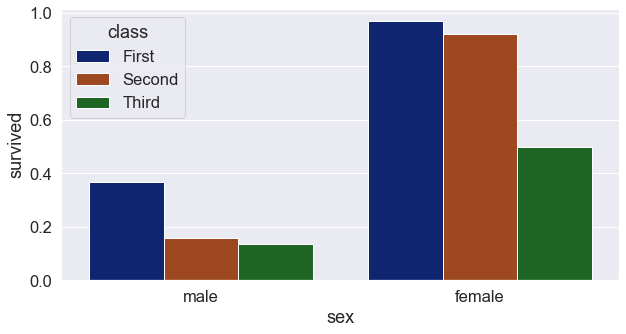

In [77]:
# barplot : 사분위 그래프
plt.figure(figsize=(10,5))
ax = sns.barplot(x='sex', y='survived', hue='class', data=titanic, ci=None)

<Figure size 720x360 with 0 Axes>

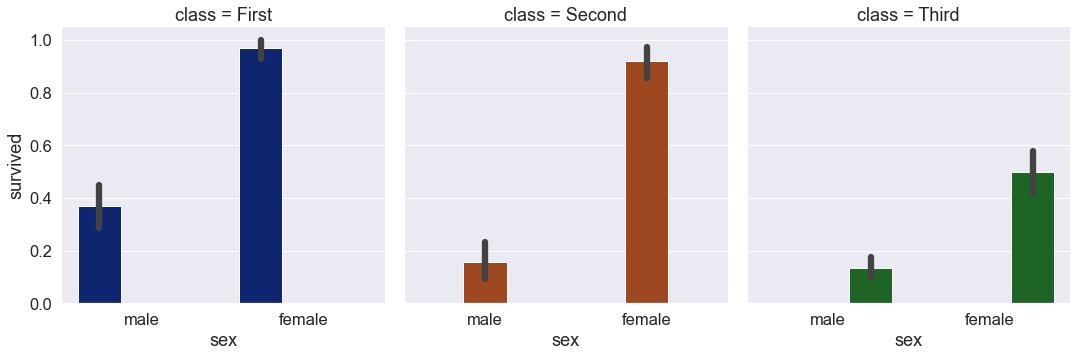

In [85]:
# barplot을 subplot으로 : catplot
plt.figure(figsize=(10,5))
ax = sns.catplot(x='sex', y='survived', hue='class', data=titanic,
                 kind='bar', col='class')

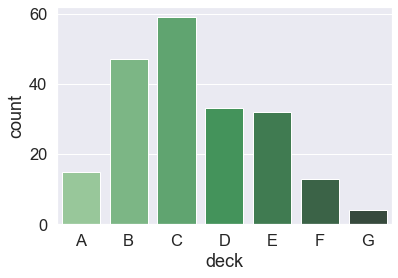

In [86]:
# countplot : 막대를 사용하여 각 deck별 구간의 관측 수를 표시
ax = sns.countplot(x='deck', data=titanic, palette='Greens_d')

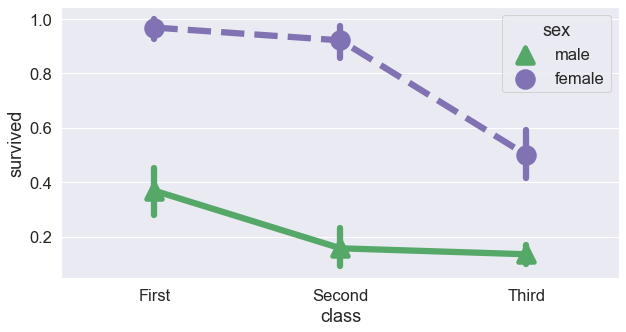

In [63]:
# pointplot : 산점도 그림문자를 사용하여 점 추정치 및 신뢰 구간을 표시
plt.figure(figsize=(10,5))
ax = sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
                  palette={'male':'g', 'female':'m'},
                  markers=['^','o'], linestyles=['-','--'])

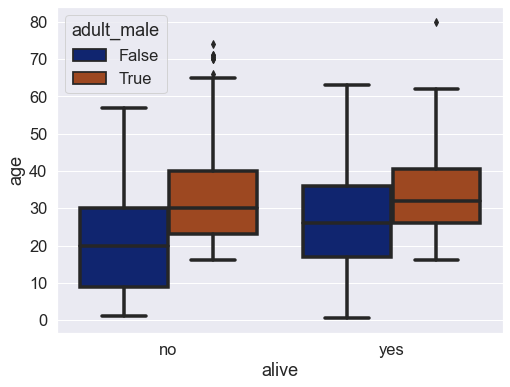

In [82]:
# boxplot : 사분위 그래프
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='alive', y='age', hue='adult_male', data=titanic)

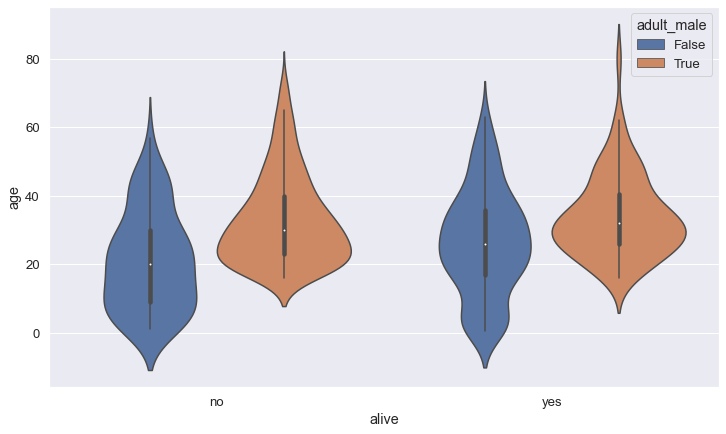

In [95]:
# violinplot : 박스 플록과 커널 밀도 추정치의 조합
plt.figure(figsize=(12,7))
ax = sns.violinplot(x='alive', y='age', hue='adult_male', data=titanic)

<AxesSubplot:xlabel='alive', ylabel='age'>

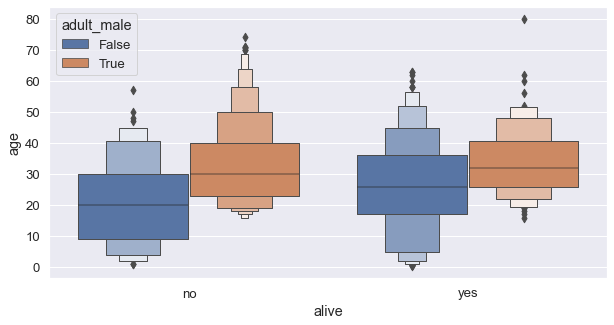

In [97]:
# boxenplot : 박스 플록과 커널 밀도 추정치의 조합
plt.figure(figsize=(10,5))
sns.boxenplot(x='alive', y='age', hue='adult_male', data=titanic)

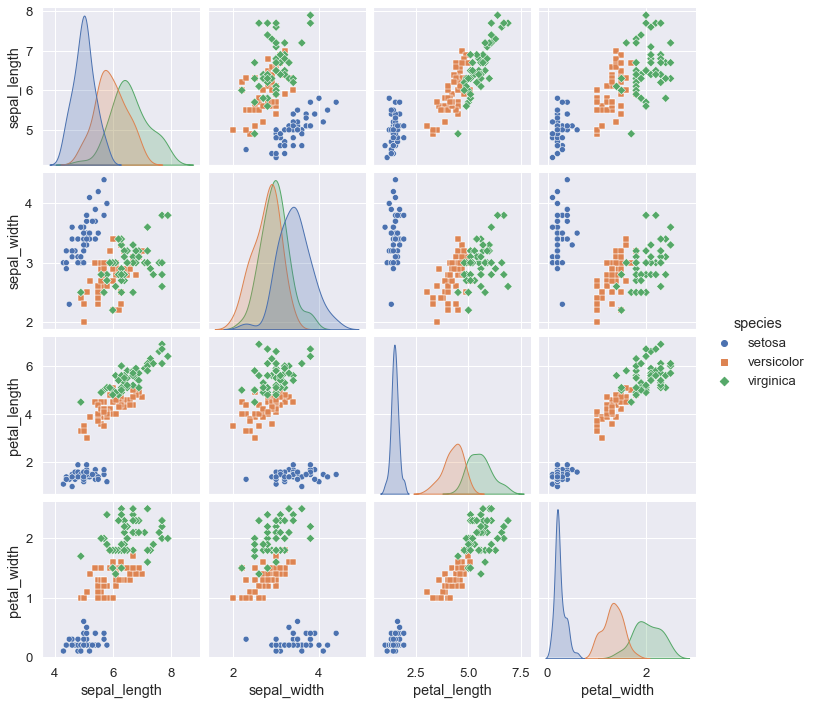

In [94]:
# pairplot : 쌍관계 그래프를 그린다.
sns.set(font_scale=1.2)
ax = sns.pairplot(iris, hue='species', markers=['o','s','D'])

- 4) Regression plots : 회기 그래프

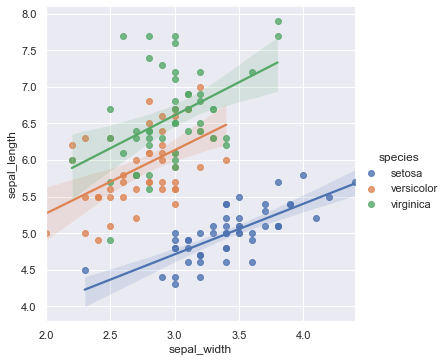

In [100]:
# lmplot : 데이터를 이용해 선형 회귀 모델을 만들고 그래프를 표현
sns.set()
ax = sns.lmplot(x='sepal_width', y='sepal_length', data=iris, hue='species')

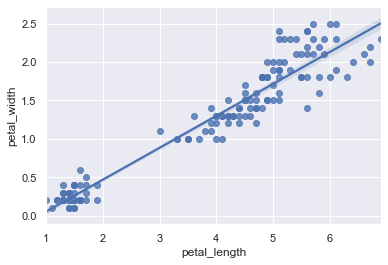

In [102]:
# regplot : 두 변수를 이용해서 선형 회귀 모형을 만들고 그래프로 표현, hue를 사용하지 못함
ax = sns.regplot(x='petal_length', y='petal_width', data=iris)

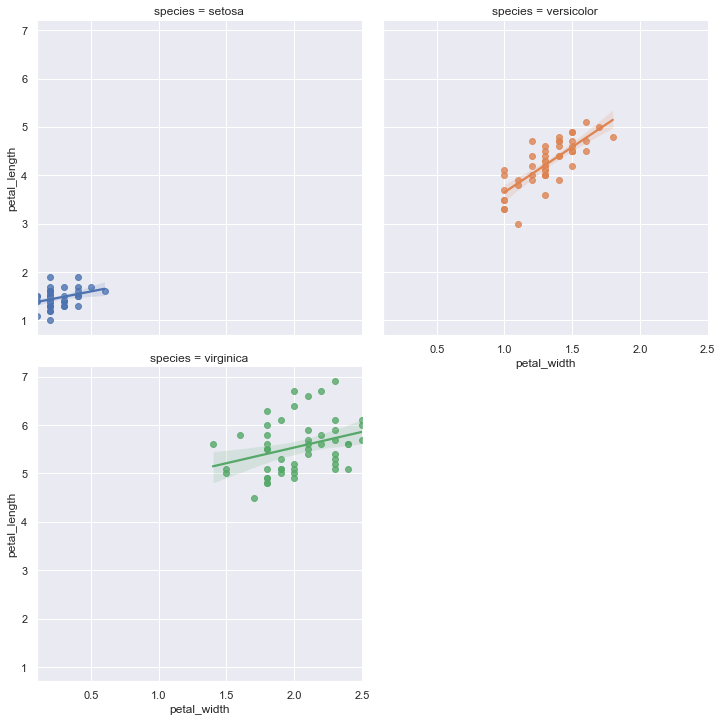

In [107]:
ax = sns.lmplot(x='petal_width', y='petal_length', data=iris, hue='species',
                col='species', col_wrap=2)

- 5) Matrix plots : 행렬 그래프

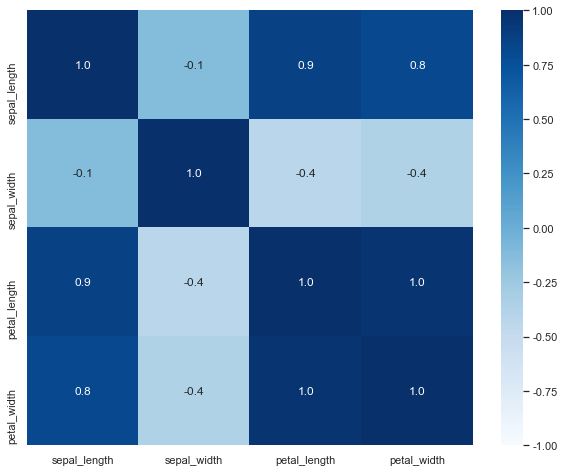

In [118]:
# heatmap : 데이터를 색으로 인코딩 된 직사각형 행렬(히트맵)로 표시
plt.figure(figsize=(10,8))
ax = sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues', 
                 fmt='.1f')

## 3.4 다중 그래프를 위한 FacetGrid
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

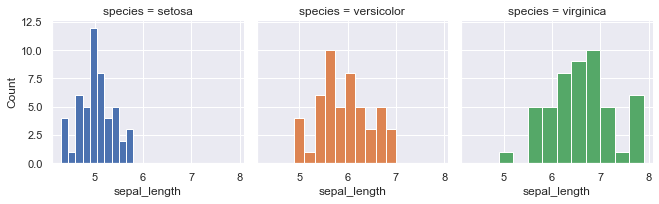

In [121]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(plt.hist, 'sepal_length')
g.set_axis_labels(y_var= 'Count')
plt.show()

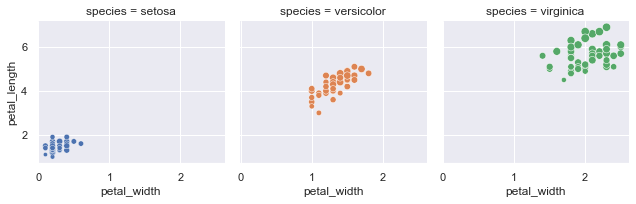

In [126]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_width', 'petal_length', size=iris.sepal_length)

plt.show()

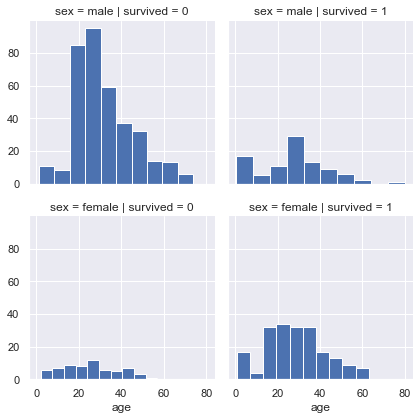

In [127]:
# map
g = sns.FacetGrid(titanic, col='survived', row='sex')
g.map(plt.hist,'age')